In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [17]:
import pandas as pd
from functools import reduce
import seaborn as sn
import matplotlib.pyplot as plt

# read in different distances
df_dist_portfolio = pd.read_csv('/content/gdrive/My Drive/capstone/vanguard distance related data/PCTPORTFOLIO_distance_to_vanguard.csv')
df_dist_mktcap = pd.read_csv('/content/gdrive/My Drive/capstone/vanguard distance related data/distance_to_vanguard_by_aggregating_mktcap.csv')
df_dist_invstyle = pd.read_csv('/content/gdrive/My Drive/capstone/vanguard distance related data/investstyle_concentration_distance_to_vanguard.csv')[['LGCYINVESTORID','invStyle_distance_to_vanguard_euclidean']]
df_dist_concent = pd.read_csv('/content/gdrive/My Drive/capstone/vanguard distance related data/investstyle_concentration_distance_to_vanguard.csv')[['LGCYINVESTORID','TOP20%SHSHLDVALpct_distance_to_vanguard']]
df_dist_turnover = pd.read_csv('/content/gdrive/My Drive/capstone/vanguard distance related data/turnover_distance_to_vanguard.csv')
df_dist_turnover.rename(columns={'LgcyInvestorId':'LGCYINVESTORID'}, inplace=True)


mat_dist_portfolio = pd.read_csv('/content/dist_mat_portfolio_ts.csv')
mat_dist_mktcap = pd.read_csv('/content/distance_matrix_df_by_pct_mktcap.csv')
mat_dist_invstyle = pd.read_csv('/content/invStyle_distance.csv')
mat_dist_concent = pd.read_csv('/content/conventration_distance.csv')
mat_dist_turnover = pd.read_csv('/content/turnover_matrix.csv')

mat_dist_portfolio.rename(columns={'Unnamed: 0':'LGCYINVESTORID'}, inplace=True)
mat_dist_mktcap.rename(columns={'Unnamed: 0':'LGCYINVESTORID'}, inplace=True)
mat_dist_turnover.rename(columns={'Unnamed: 0':'LGCYINVESTORID'}, inplace=True)
mat_dist_invstyle.rename(columns={'LgcyInvestorId':'LGCYINVESTORID'}, inplace=True)

id = '2006452'
mat_dist_portfolio = mat_dist_portfolio[['LGCYINVESTORID',id]]
mat_dist_mktcap = mat_dist_mktcap[['LGCYINVESTORID',id]]
mat_dist_invstyle = mat_dist_invstyle[['LGCYINVESTORID',id]]
mat_dist_concent = mat_dist_concent[['LGCYINVESTORID',id]]
mat_dist_turnover = mat_dist_turnover[['LGCYINVESTORID',id]]


In [16]:
mat_dist_turnover

,LGCYINVESTORID,2000264,2001934,2001935,2001989,2001999,2002019,2002142,2002146,2002158,2002179,2002180,2002195,2002205,2002222,2002292,2002295,2002303,2002362,2002389,2002446,2002451,2002468,2002496,2002506,2002511,2002548,2002582,2002628,2002658,2002659,2002678,2002695,2002713,2002715,2002801,2002819,2002823,2002848,2002867,...,3965008,4040011,4059340,4889409,4924814,4950170,4962258,5050280,5200477,5205742,5206490,5206923,5275446,5308615,5436717,5480445,5505145,5520904,5529187,5713469,5819294,5844860,5915225,5986931,6053249,6129655,6139212,6248967,6271047,6921752,7016524,7185253,9098246,9113038,9969058,10061989,10075382,10110259,10233291,10235680
0,2000264,0.000000,276.850767,236.368252,237.778824,276.853207,266.811433,297.388414,236.238827,287.578097,566.986114,238.023247,252.492498,237.977726,212.375124,255.088768,795.874343,281.998240,477.418455,258.837661,607.487158,244.341457,256.786939,454.031758,493.178170,428.610559,363.220487,250.025055,285.310592,264.189007,350.470807,319.983937,209.786020,180.089450,214.228204,251.528854,242.417228,235.778407,399.237413,260.361458,...,266.392517,485.846560,741.979491,288.232467,252.457054,421.024069,327.732038,460.336872,258.066054,286.332541,303.980535,571.307167,317.197018,291.563496,248.099485,336.699470,684.352951,332.869289,484.240036,330.747971,247.193416,271.206542,446.132193,232.344633,294.974346,293.367738,274.075290,239.844817,245.597163,437.280797,318.367805,223.910358,250.649982,279.607918,323.604027,293.846622,295.746468,243.086567,239.585630,240.836472
1,2001934,276.850767,0.000000,121.865892,192.887597,12.149316,42.844183,29.163691,239.388930,16.456340,653.246144,107.384828,79.456752,127.874354,375.076409,47.062388,913.697276,16.142696,562.339998,101.623824,568.084053,152.149743,287.916314,382.690404,373.140469,496.365124,409.897936,58.044106,115.507711,244.100095,231.215707,57.896677,212.366907,143.071590,152.010438,78.371571,113.195207,157.555358,412.084585,201.192374,...,350.977628,441.474907,863.581174,314.921891,160.265830,352.919095,427.506623,492.744455,123.685823,292.143494,220.192654,671.222473,335.721385,35.098394,78.436910,423.136635,809.753743,247.941263,577.983062,142.569074,130.366160,245.126424,574.213995,163.176259,53.766957,265.536274,121.789052,176.175569,103.465098,512.284818,263.364724,175.364339,109.816834,55.880657,357.096660,75.537278,28.381034,97.763222,190.843399,190.385477
2,2001935,236.368252,121.865892,0.000000,74.232655,116.867497,83.097368,149.111852,124.282883,133.967613,537.410390,21.361975,47.061575,102.135037,302.809708,77.832844,795.395417,132.392318,442.675244,71.858469,507.326166,45.969767,182.499732,317.038685,335.561434,376.326176,303.800321,104.664795,103.842230,191.200300,181.117622,177.313081,128.768940,106.202228,59.612466,48.807005,36.142465,41.242577,309.010359,94.396431,...,258.997497,386.406246,752.049913,201.855553,67.658914,277.494129,325.536665,390.159314,63.267626,182.946213,132.266696,553.432137,234.523226,131.385868,62.394990,331.281009,691.855326,226.650580,464.527561,176.702242,25.611856,128.604177,470.611468,77.121036,138.019753,159.442162,97.426438,64.245947,49.715926,395.782676,195.155248,117.470839,46.009792,109.693288,322.159525,120.000968,145.723586,162.710300,71.411718,74.083200
3,2001989,237.778824,192.887597,74.232655,0.000000,186.982970,153.560431,219.407389,60.494155,204.166780,465.313151,88.987331,115.208474,144.633683,277.242623,148.663792,727.107758,204.258661,370.664379,117.362352,482.748864,51.502602,132.213326,306.373019,325.394674,305.009401,244.084409,172.081089,152.639265,196.582969,201.139323,248.386853,122.339175,144.698691,66.091897,117.384699,84.894421,43.868675,251.946756,49.495111,...,207.955035,385.536469,680.783685,132.535128,60.439680,262.529785,265.803134,325.518328,116.526864,113.757933,128.894206,481.034721,169.929946,199.974032,128.591470,297.565105,626.545577,235.500476,398.064920,223.731726,72.973070,64.788071,415.178053,90.929892,202.127679,123.468578,131.229344,45.033464,99.9

In [18]:
mat_dist_turnover

,LGCYINVESTORID,2006452
0,2000264,278.335275
1,2001934,301.780252
2,2001935,189.018717
3,2001989,138.354136
4,2001999,298.885008
...,...,...
223,10061989,302.040362
224,10075382,326.884389
225,10110259,321.102237
226,10233291,133.883043


In [19]:
mat_dists = [mat_dist_portfolio, mat_dist_mktcap, mat_dist_invstyle, mat_dist_concent, mat_dist_turnover]
mat_dist_all = reduce(lambda left,right: pd.merge(left,right,on='LGCYINVESTORID'), mat_dists)
mat_dist_all = mat_dist_all.drop(['LGCYINVESTORID'], axis=1)
mat_dist_all.columns = ['portfolio', 'mktcap', 'invstyle', 'concent', 'turnover']
mat_dist_all

,portfolio,mktcap,invstyle,concent,turnover
0,11.465036,0.488470,0.073132,2.181356,278.335275
1,7.392957,0.231595,0.079810,0.096933,301.780252
2,7.693178,0.251398,0.501777,0.319081,189.018717
3,10.085540,0.242972,0.188559,1.152752,138.354136
4,6.914048,0.282203,0.120169,0.137677,298.885008
...,...,...,...,...,...
178,10.188863,1.197379,0.350706,2.441242,258.679360
179,10.302741,0.282379,0.267419,0.380225,217.927583
180,6.587545,0.522771,0.081758,2.194035,288.711267
181,8.202157,0.621227,0.711191,2.964799,326.884389


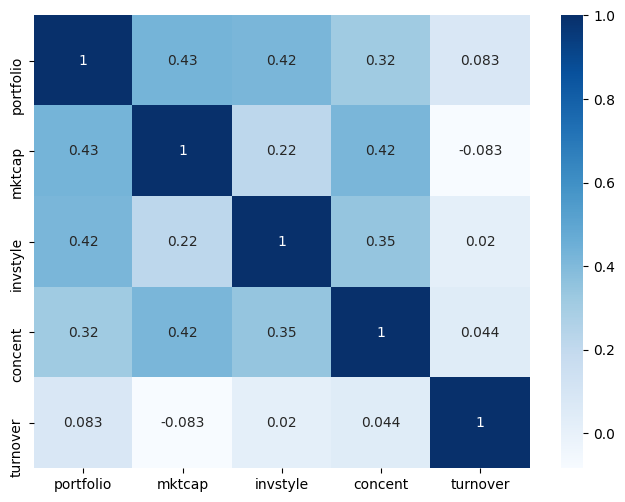

           portfolio    mktcap  invstyle   concent  turnover
portfolio   1.000000  0.429333  0.416693  0.318127  0.082611
mktcap      0.429333  1.000000  0.220889  0.419937 -0.083437
invstyle    0.416693  0.220889  1.000000  0.345267  0.020432
concent     0.318127  0.419937  0.345267  1.000000  0.043752
turnover    0.082611 -0.083437  0.020432  0.043752  1.000000


In [20]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100

# Correlation matrix of different distance metrics
mat_corr = mat_dist_all.corr()
sn.heatmap(mat_corr, annot=True, cmap="Blues")
plt.show()
print(mat_corr)

## Using distance to vanguard (DTM for ts)

In [ ]:
dists = [df_dist_portfolio, df_dist_mktcap, df_dist_invstyle, df_dist_concent, df_dist_turnover]
df_dist_all = reduce(lambda left,right: pd.merge(left,right,on='LGCYINVESTORID'), dists)
df_dist_all = df_dist_all.drop(['Unnamed: 0_x','FULLNAME_x','FULLNAME_y','Unnamed: 0_y','FullName','LGCYINVESTORID'], axis=1)

In [ ]:
df_dist_all.columns = ['portfolio', 'mktcap', 'invstyle', 'concent', 'turnover']

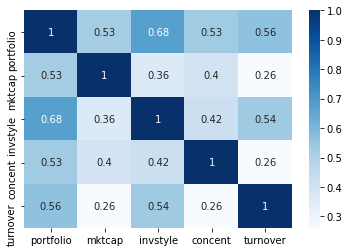

           portfolio    mktcap  invstyle   concent  turnover
portfolio   1.000000  0.526665  0.677413  0.529751  0.564703
mktcap      0.526665  1.000000  0.362805  0.399324  0.262374
invstyle    0.677413  0.362805  1.000000  0.424677  0.537161
concent     0.529751  0.399324  0.424677  1.000000  0.261209
turnover    0.564703  0.262374  0.537161  0.261209  1.000000


In [ ]:
# Correlation matrix of different distance metrics
corr = df_dist_all.corr()
sn.heatmap(corr, annot=True, cmap="Blues")
plt.show()
print(corr)